<a href="https://colab.research.google.com/github/x94173000/titanic-analysis/blob/main/%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC%EF%BC%884%EF%BC%89_%E6%A8%A1%E5%9E%8B%E5%84%AA%E5%8C%96%E8%88%87%E6%AF%94%E8%BC%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **載入資料集**

In [84]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **資料探索與分析 (EDA)**

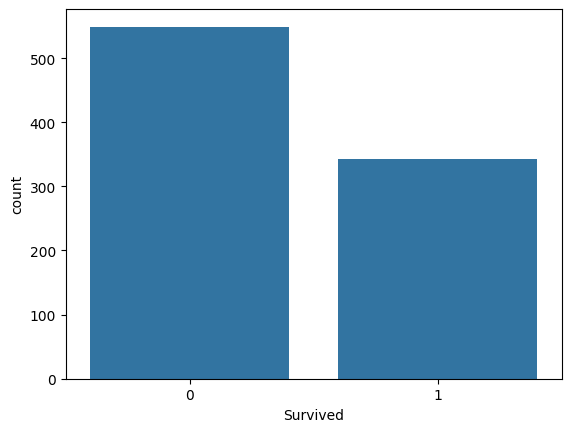

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

#首先分析生存與死亡的比例
sns.countplot(x = 'Survived', data = df)
plt.show()

越低等船艙的生存率反而越高

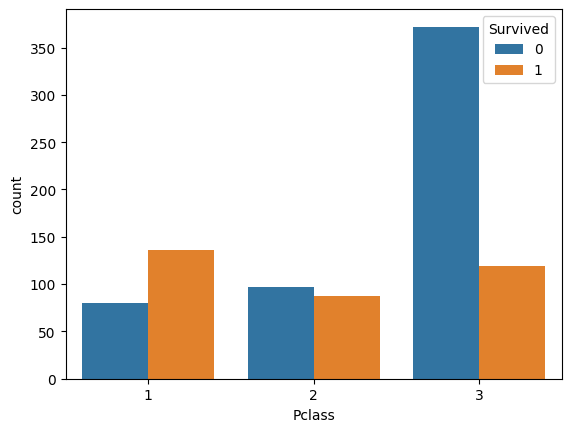

In [89]:
#艙等與生存率關係
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)
plt.show()

女性生存率較高

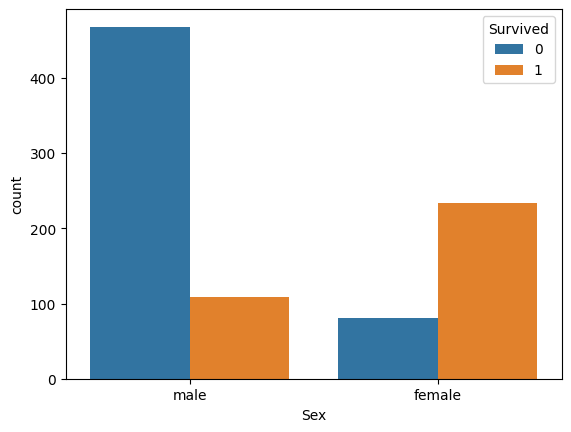

In [90]:
#性別與生存率關係
sns.countplot(x = 'Sex', hue = 'Survived', data = df)
plt.show()

S港出發的較容易死亡(或許是S港買的票較便宜)

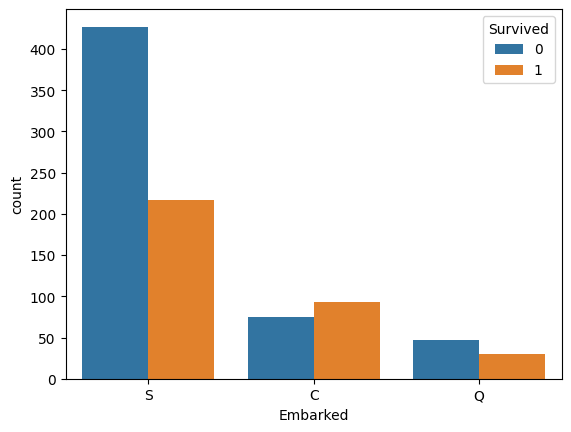

In [91]:
#出發港口與生存率關係
sns.countplot(x = 'Embarked', hue = 'Survived', data = df)
plt.show()

比較年齡和生存率之間的關係，發現年紀較小的生存率較高(符合『孩童與女人優先理論』)

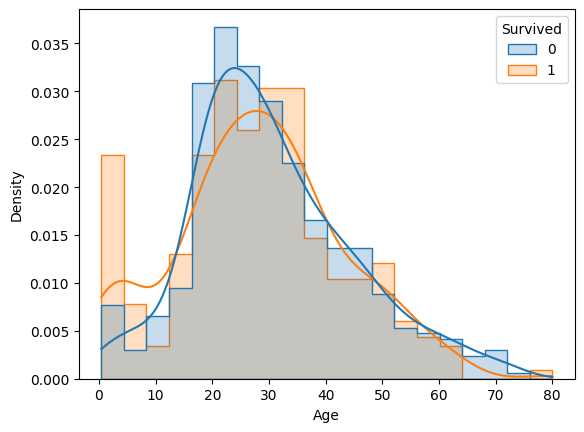

In [92]:
# 觀察Age和Survived的關係
#圖1
sns.histplot(data=df, x='Age', hue='Survived', kde=True, element='step', stat='density', common_norm=False)
plt.show()

#圖2
# 定義distribution函數，以KDE圖觀察欄位與Survived之間的關係
def distribution(df,var,target,**kwargs):
  # 設定row和col參數
  row = kwargs.get('row',None)
  col = kwargs.get('col',None)
distribution(df,var='Age',target='Survived')
plt.show()

比較票價和生存率之間的關係，發現票價低者死亡率較高

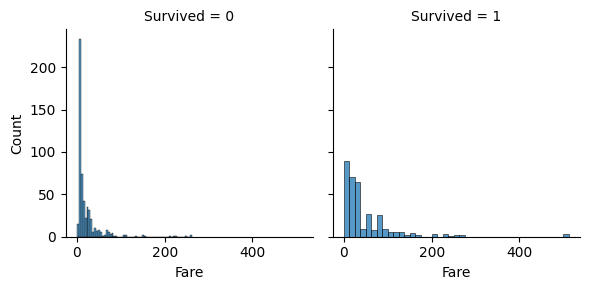

In [93]:
# 觀察Fare和Survived的關係
#圖1
g = sns.FacetGrid(df, col = 'Survived')
g.map(sns.histplot , 'Fare' , kde = False)
plt.show

#圖2
distribution(df,var='Fare',target='Survived')
plt.show()

父母＋小孩的數量跟生存率的關係，發現沒有跟父母小孩一起來的生存率比起有跟父母小孩來的低

<function matplotlib.pyplot.show(close=None, block=None)>

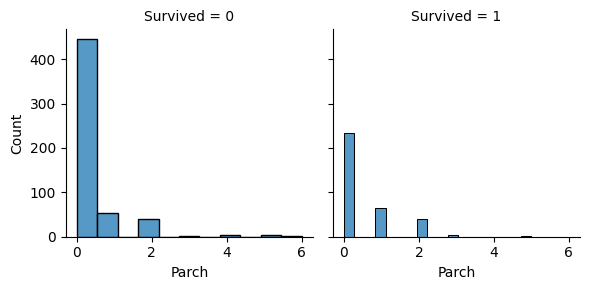

In [94]:
# Parch和Survived的關係
g = sns.FacetGrid(df, col = 'Survived')
g.map(sns.histplot , 'Parch' , kde = False)
plt.show

兄弟姊妹＋丈夫妻子的數量跟生存率的關係，發現沒有帶兄弟姊妹＋丈夫妻子一起來的生存率比起有跟兄弟姊妹＋丈夫妻子來的低

<function matplotlib.pyplot.show(close=None, block=None)>

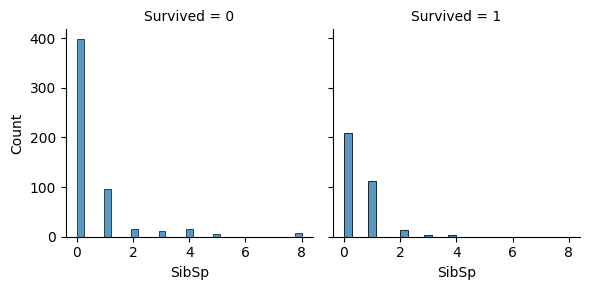

In [95]:
# Sibsp和Survived的關係
g = sns.FacetGrid(df, col = 'Survived')
g.map(sns.histplot , 'SibSp' , kde = False)
plt.show

# **資料清理與型態轉換**

刪除多餘欄位


*   PassengerId：乘客編號隨機，與生存無關
*   Ticket：船票編號，與生存無關
*   Cabin：欄位中的缺失值(687)佔全體(891)中的77%，太多了乾脆刪掉



先轉換類別欄位，再填補缺失值

In [96]:
# Sex
df['Sex'] = df['Sex'].replace({'male':1,'female':0})


#Embarked用眾數填補
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])
# Embarked使用OneHotEncoder
df = pd.get_dummies(df,columns=['Embarked'],dtype=int)


這裡用多種策略處理 Age 缺失值

df_del：全部刪除

df_mean：平均數填補缺

df_median：中位數填補

df_mode：眾數填補

In [97]:
# 全部刪除
df_del = df.copy()
df_del.dropna(subset=['Age'],inplace=True)

# 使用平均數填補
df_mean = df.copy()
df_mean['Age'].fillna(df_mean['Age'].mean(),inplace=True)

# 使用中位數填補
df_median = df.copy()
df_median['Age'].fillna(df_median['Age'].median(),inplace=True)

# 使用眾數填補
df_mode = df.copy()
df_mode['Age'].fillna(df_mode['Age'].mode()[0],inplace=True)

# **特徵工程**


把“父母＋小孩”加上“兄弟姊妹＋丈夫妻子”的數量變成一個新的欄位叫做家庭大小，在預測上會更為準確

In [98]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

觀察一下Name，發現裏頭有稱謂的資訊，也能拿來提高模型的準確度

In [99]:
df['Title'] = df['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [100]:
#把部分稱謂合併
title_Classify = {
    'Sir':'Royalty',
    'Jonkheer':'Royalty',
    'the Countess':'Royalty',
    'Lady':'Royalty',
    'Capt':'official',
    'Col':'official',
    'Major':'official',
    'Don':'official',
    'Rev':'official',
    'Dr':'official',
    'Mlle':'Miss',
    'Miss':'Miss',
    'Mme':'Mrs',
    'Mrs':'Mrs',
    'Ms':'Mrs',
    'Mr':'Mr',
    'Master':'Master'

}
df['Title'] = df['Title'].replace(title_Classify)
df['Title'].value_counts()

Title
Mr          517
Miss        184
Mrs         127
Master       40
official     19
Royalty       4
Name: count, dtype: int64

In [101]:
# 使用OneHotEncoder轉換類別欄位
df_Title_ohe = pd.get_dummies(df['Title'], prefix='Title_')

# 加入不同缺失值處理的變數中，以利後續模型比較
df_del = df_del.join(df_Title_ohe)
df_mean = df_mean.join(df_Title_ohe)
df_median = df_median.join(df_Title_ohe)
df_mode = df_mode.join(df_Title_ohe)

In [102]:
#刪除Name,Ticket
df_del = df_del.drop(['Name','Ticket','Cabin'] , axis = 1)
df_mean = df_mean.drop(['Name','Ticket','Cabin'] , axis = 1)
df_median = df_median.drop(['Name','Ticket','Cabin'] , axis = 1)
df_mode = df_mode.drop(['Name','Ticket','Cabin'] , axis = 1)

df_del

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Royalty,Title__official
0,1,0,3,1,22.0,1,0,7.2500,0,0,1,False,False,True,False,False,False
1,2,1,1,0,38.0,1,0,71.2833,1,0,0,False,False,False,True,False,False
2,3,1,3,0,26.0,0,0,7.9250,0,0,1,False,True,False,False,False,False
3,4,1,1,0,35.0,1,0,53.1000,0,0,1,False,False,False,True,False,False
4,5,0,3,1,35.0,0,0,8.0500,0,0,1,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,0,39.0,0,5,29.1250,0,1,0,False,False,False,True,False,False
886,887,0,2,1,27.0,0,0,13.0000,0,0,1,False,False,False,False,False,True
887,888,1,1,0,19.0,0,0,30.0000,0,0,1,False,True,False,False,False,False
889,890,1,1,1,26.0,0,0,30.0000,1,0,0,False,False,True,False,False,False


# **模型分析與比較**

採用 scikit-learn 五種基本模型進行分析與比較

使用 sklearn.model_selection 下的 GridSearchCV( )調整參數

*   邏輯回歸 Logistic Regression
*   支持向量機 Support Vector Machines
*   決策樹 Decision Tree Classifier
*   隨機森林 Random Forest Classifier
*   K-近鄰演算法 K Nearest Neighbor

In [103]:
# 載入模型
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

(1) 以不同模型，評估 df_del 的準確度

In [104]:
# 定義特徵欄位X、目標欄位Y，並完成訓練集資料
columns_X = set(df_del.columns) - {'Survived'}
columns_y = ['Survived']
train_X = df_del[list(columns_X)]
train_y = df_del[columns_y]

# 依不同模型進行基本分析
models = {
    'Logistic Regression':LogisticRegression(random_state=0,max_iter=3000),
    'SVM':SVC(),
    'Decision Tree Classifer':DecisionTreeClassifier(),
    'Random Forest Classifer':RandomForestClassifier(),
    'KNN':KNeighborsClassifier()
      }

scores_del = [ ]
for model_name,model in models.items():
  score = cross_val_score(model,train_X,train_y.values.ravel(),cv=5,scoring='accuracy').mean()
  scores_del.append({'model':model_name, 'score_del':score})

In [105]:
# 分析並優化超參數調整流程
from sklearn.model_selection import GridSearchCV
model_params = {
  'Logistic Regression(Opt)':{
      'model':LogisticRegression(),
      'params':{'C': [0.01, 0.1, 1, 10],'solver': ['liblinear','lbfgs']}
              },
  'SVM(Opt)':{
      'model':SVC(),
      'params':{'C':[0.1,1,10],'kernel':['rbf'],'gamma':[0.05, 0.1]}
      },
  'Decision Tree Classifier(Opt)':{
      'model':DecisionTreeClassifier(),
      'params':{'criterion': ['gini', 'entropy'],'max_depth': [4, 6, 8],
            'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
          },
  'Random Forest Classifier(Opt)':{
      'model':RandomForestClassifier(),
      'params':{'n_estimators': [10, 50],'max_depth': [4, 6, 8],'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4],'max_features': ['auto', 'sqrt']}
          },
  'KNN(Opt)':{
      'model':KNeighborsClassifier(),
      'params':{'n_neighbors': [3, 5, 7, 9],'weights': ['uniform', 'distance']}
      }
  }

scores_del_opt = []

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv=5)
  score = cross_val_score(mp['model'],train_X,train_y.values.ravel(),cv=5,scoring='accuracy').mean()
  scores_del_opt.append({'model':model_name,'score_del':score})

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [106]:
combined1 = scores_del + scores_del_opt

df1 = pd.DataFrame(combined1)
df1.sort_values(by='score_del',ascending=False)

,model,score_del
0,Logistic Regression,0.812361
8,Random Forest Classifier(Opt),0.798385
5,Logistic Regression(Opt),0.792751
3,Random Forest Classifer,0.791392
7,Decision Tree Classifier(Opt),0.746587
2,Decision Tree Classifer,0.724190
1,SVM,0.634473
6,SVM(Opt),0.634473
4,KNN,0.553364
9,KNN(Opt),0.553364


(2) 以不同模型，評估 titanic_mean 的準確度

In [108]:
# 定義特徵欄位X、目標欄位Y，並完成訓練集資料
columns_X = set(df_mean.columns) - {'Survived'}
columns_y = ['Survived']
train_X = df_mean[list(columns_X)]
train_y = df_mean[columns_y]

# 依不同模型進行基本分析
models = {
    'Logistic Regression':LogisticRegression(random_state=0,max_iter=3000),
    'SVM':SVC(),
    'Decision Tree Classifer':DecisionTreeClassifier(),
    'Random Forest Classifer':RandomForestClassifier(),
    'KNN':KNeighborsClassifier()
      }

scores_mean = [ ]
for model_name,model in models.items():
  score = cross_val_score(model,train_X,train_y.values.ravel(),cv=5,scoring='accuracy').mean()
  scores_mean.append({'model':model_name, 'score_mean':score})

In [109]:
# 分析並優化超參數調整流程
from sklearn.model_selection import GridSearchCV
model_params = {
  'Logistic Regression(Opt)':{
      'model':LogisticRegression(),
      'params':{'C': [0.01, 0.1, 1, 10],'solver': ['liblinear','lbfgs']}
              },
  'SVM(Opt)':{
      'model':SVC(),
      'params':{'C':[0.1,1,10],'kernel':['rbf'],'gamma':[0.05, 0.1]}
      },
  'Decision Tree Classifier(Opt)':{
      'model':DecisionTreeClassifier(),
      'params':{'criterion': ['gini', 'entropy'],'max_depth': [4, 6, 8],
            'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
          },
  'Random Forest Classifier(Opt)':{
      'model':RandomForestClassifier(),
      'params':{'n_estimators': [10, 50],'max_depth': [4, 6, 8],'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4],'max_features': ['auto', 'sqrt']}
          },
  'KNN(Opt)':{
      'model':KNeighborsClassifier(),
      'params':{'n_neighbors': [3, 5, 7, 9],'weights': ['uniform', 'distance']}
      }
  }

scores_mean_opt = []

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv=5)
  score = cross_val_score(mp['model'],train_X,train_y.values.ravel(),cv=5,scoring='accuracy').mean()
  scores_mean_opt.append({'model':model_name,'score_mean':score})

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [110]:
combined2 = scores_mean + scores_mean_opt

df2 = pd.DataFrame(combined2)
df2.sort_values(by='score_mean',ascending=False)

,model,score_mean
0,Logistic Regression,0.826025
3,Random Forest Classifer,0.813753
5,Logistic Regression(Opt),0.813747
8,Random Forest Classifier(Opt),0.808141
7,Decision Tree Classifier(Opt),0.739922
2,Decision Tree Classifer,0.736501
1,SVM,0.638635
6,SVM(Opt),0.638635
4,KNN,0.542000
9,KNN(Opt),0.542000


(3) 以不同模型，評估 titanic_median 的準確度

In [112]:
# 定義特徵欄位X、目標欄位Y，並完成訓練集資料
columns_X = set(df_median.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_median[list(columns_X)]
train_y = df_median[columns_y]

# 依不同模型進行基本分析
models = {
    'Logistic Regression':LogisticRegression(random_state=0,max_iter=3000),
    'SVM':SVC(),
    'Decision Tree Classifer':DecisionTreeClassifier(),
    'Random Forest Classifer':RandomForestClassifier(),
    'KNN':KNeighborsClassifier()
      }

scores_median = [ ]
for model_name,model in models.items():
  score = cross_val_score(model,train_X,train_y.values.ravel(),cv=5,scoring='accuracy').mean()
  scores_median.append({'model':model_name, 'score_median':score})

In [113]:
# 分析並優化超參數調整流程
from sklearn.model_selection import GridSearchCV
model_params = {
  'Logistic Regression(Opt)':{
      'model':LogisticRegression(),
      'params':{'C': [0.01, 0.1, 1, 10],'solver': ['liblinear','lbfgs']}
              },
  'SVM(Opt)':{
      'model':SVC(),
      'params':{'C':[0.1,1,10],'kernel':['rbf'],'gamma':[0.05, 0.1]}
      },
  'Decision Tree Classifier(Opt)':{
      'model':DecisionTreeClassifier(),
      'params':{'criterion': ['gini', 'entropy'],'max_depth': [4, 6, 8],
            'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
          },
  'Random Forest Classifier(Opt)':{
      'model':RandomForestClassifier(),
      'params':{'n_estimators': [10, 50],'max_depth': [4, 6, 8],'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4],'max_features': ['auto', 'sqrt']}
          },
  'KNN(Opt)':{
      'model':KNeighborsClassifier(),
      'params':{'n_neighbors': [3, 5, 7, 9],'weights': ['uniform', 'distance']}
      }
  }

scores_median_opt = []

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv=5)
  score = cross_val_score(mp['model'],train_X,train_y.values.ravel(),cv=5,scoring='accuracy').mean()
  scores_median_opt.append({'model':model_name,'score_median':score})

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [114]:
combined3 = scores_median + scores_median_opt

df3 = pd.DataFrame(combined3)
df3.sort_values(by='score_median',ascending=False)

,model,score_median
0,Logistic Regression,0.826025
3,Random Forest Classifer,0.822729
8,Random Forest Classifier(Opt),0.813747
5,Logistic Regression(Opt),0.801412
2,Decision Tree Classifer,0.751083
7,Decision Tree Classifier(Opt),0.720802
1,SVM,0.638635
6,SVM(Opt),0.638635
4,KNN,0.542000
9,KNN(Opt),0.542000


(4) 以不同模型，評估 titanic_mode 的準確度

In [115]:
# 定義特徵欄位X、目標欄位Y，並完成訓練集資料
columns_X = set(df_mode.columns) - {'Survived'}
columns_y = ['Survived']
train_X = df_mode[list(columns_X)]
train_y = df_mode[columns_y]

# 依不同模型進行基本分析
models = {
    'Logistic Regression':LogisticRegression(random_state=0,max_iter=3000),
    'SVM':SVC(),
    'Decision Tree Classifer':DecisionTreeClassifier(),
    'Random Forest Classifer':RandomForestClassifier(),
    'KNN':KNeighborsClassifier()
      }

scores_mode = [ ]
for model_name,model in models.items():
  score = cross_val_score(model,train_X,train_y.values.ravel(),cv=5,scoring='accuracy').mean()
  scores_mode.append({'model':model_name, 'score_mode':score})

In [116]:
# 分析並優化超參數調整流程
from sklearn.model_selection import GridSearchCV
model_params = {
  'Logistic Regression(Opt)':{
      'model':LogisticRegression(),
      'params':{'C': [0.01, 0.1, 1, 10],'solver': ['liblinear','lbfgs']}
              },
  'SVM(Opt)':{
      'model':SVC(),
      'params':{'C':[0.1,1,10],'kernel':['rbf'],'gamma':[0.05, 0.1]}
      },
  'Decision Tree Classifier(Opt)':{
      'model':DecisionTreeClassifier(),
      'params':{'criterion': ['gini', 'entropy'],'max_depth': [4, 6, 8],
            'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
          },
  'Random Forest Classifier(Opt)':{
      'model':RandomForestClassifier(),
      'params':{'n_estimators': [10, 50],'max_depth': [4, 6, 8],'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4],'max_features': ['auto', 'sqrt']}
          },
  'KNN(Opt)':{
      'model':KNeighborsClassifier(),
      'params':{'n_neighbors': [3, 5, 7, 9],'weights': ['uniform', 'distance']}
      }
  }

scores_mode_opt = []

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv=5)
  score = cross_val_score(mp['model'],train_X,train_y.values.ravel(),cv=5,scoring='accuracy').mean()
  scores_mode_opt.append({'model':model_name,'score_mode':score})

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [117]:
combined4 = scores_mode + scores_mode_opt

df4 = pd.DataFrame(combined4)
df4.sort_values(by='score_mode',ascending=False)

,model,score_mode
0,Logistic Regression,0.822660
3,Random Forest Classifer,0.818229
5,Logistic Regression(Opt),0.807024
8,Random Forest Classifier(Opt),0.807018
2,Decision Tree Classifer,0.745477
7,Decision Tree Classifier(Opt),0.745446
1,SVM,0.639759
6,SVM(Opt),0.639759
4,KNN,0.538629
9,KNN(Opt),0.538629


(5) 整理與比較：採用 Logistic Regression 模型分析的 Accuracy 最高

In [118]:
com = pd.merge(df1,df2,on='model')
com = pd.merge(com,df3,on='model')
com = pd.merge(com,df4,on='model')
com.sort_values(by='score_del',ascending=False)

,model,score_del,score_mean,score_median,score_mode
0,Logistic Regression,0.812361,0.826025,0.826025,0.822660
8,Random Forest Classifier(Opt),0.798385,0.808141,0.813747,0.807018
5,Logistic Regression(Opt),0.792751,0.813747,0.801412,0.807024
3,Random Forest Classifer,0.791392,0.813753,0.822729,0.818229
7,Decision Tree Classifier(Opt),0.746587,0.739922,0.720802,0.745446
2,Decision Tree Classifer,0.724190,0.736501,0.751083,0.745477
1,SVM,0.634473,0.638635,0.638635,0.639759
6,SVM(Opt),0.634473,0.638635,0.638635,0.639759
4,KNN,0.553364,0.542000,0.542000,0.538629
9,KNN(Opt),0.553364,0.542000,0.542000,0.538629


# **結論**

1.從不同填補Age遺漏值的方法來看，用mean或median準確率相對其他兩個方法高

2.Logistic Regression 的準確度以0.82最高

後續目標：
希望能把準確率提高到0.83